In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [482]:
data_train = pd.read_csv('/Users/erwinqodariyah/Documents/SEMESTER_3/Machine Learning/praktikum-3/praktikum-3-ml-rka-2024/Performa_Siswa_Anime(Train).csv')
data_test = pd.read_csv('/Users/erwinqodariyah/Documents/SEMESTER_3/Machine Learning/praktikum-3/praktikum-3-ml-rka-2024/Performa_Siswa_Anime(Test).csv')

data_train.head(100)

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Nilai_Ujian
0,Elner,NaN,84.0,Low,High,No,7.0,NaN,Low,Yes,0,NaN,Medium,Public,Positive,3,No,High School,Near,67
1,Male Staff,19.0,NaN,Low,Medium,No,8.0,NaN,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,61
2,Bangai ROGIRI,24.0,98.0,Medium,Medium,Yes,7.0,NaN,Medium,Yes,2,NaN,Medium,Public,Neutral,4,No,Postgraduate,Near,74
3,Pakkun,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,71
4,Cole MOZELEEMAY,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Older Lemon Brother,22.0,64.0,Low,Medium,No,7.0,NaN,Low,No,1,NaN,Medium,Public,Negative,3,No,High School,Near,62
96,Female Kidnapper,22.0,81.0,Medium,Medium,Yes,7.0,77.0,Low,Yes,2,Medium,NaN,Public,Positive,3,No,Postgraduate,Far,68
97,Dr. Shu,20.0,69.0,High,High,Yes,6.0,73.0,Medium,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,66
98,Shinichiro KIRIHARA,NaN,67.0,Low,Medium,No,5.0,92.0,High,Yes,0,NaN,Medium,Public,Positive,3,No,College,Near,64


In [483]:
data_test

,Nama,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,Ouzen (オーゼン),20.0,77,Medium,High,Yes,7,53,Medium,Yes,1,Low,Medium,Public,Positive,4,No,High School,Near
1,"Yuigahama, Yui (由比ヶ浜 結衣)",28.0,95,Medium,Medium,Yes,8,80,Medium,Yes,0,NaN,Medium,Private,Negative,2,No,High School,Moderate
2,Hiei (飛影),21.0,85,Medium,High,Yes,5,53,Medium,Yes,2,Low,Medium,Private,Neutral,3,No,College,Near
3,Dabi (荼毘),16.0,87,High,Medium,Yes,7,79,Medium,Yes,1,Low,Medium,Public,Neutral,4,No,Postgraduate,Moderate
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",24.0,80,High,Medium,Yes,7,72,Medium,No,2,Medium,Medium,Public,Neutral,3,No,High School,Near
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,"Saotome, Mary (早乙女 芽亜里)",16.0,81,Medium,Medium,No,9,61,Medium,NaN,3,High,High,Public,Neutral,2,No,High School,Near
1038,"Aoyama, Nanami (青山 七海)",19.0,64,High,Medium,Yes,8,59,Medium,Yes,2,High,Medium,Private,Positive,1,No,College,Near
1039,Tobi (トビ),20.0,61,Medium,Medium,No,7,71,High,Yes,2,Medium,Low,Public,Positive,3,No,High School,Near
1040,"Evans, Soul Eater (ソウル・イーター・エヴァンス)",15.0,96,High,Medium,No,7,94,Low,No,3,Medium,Medium,Private,Neutral,3,No,College,Moderate


In [484]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         6378 non-null   object 
 1   Jam_Belajar                  5424 non-null   float64
 2   Kehadiran                    5791 non-null   float64
 3   Keterlibatan_Orangtua        6030 non-null   object 
 4   Akses_ke_Sumber_Daya         6254 non-null   object 
 5   Kegiatan_Ekstrakurikuler     6378 non-null   object 
 6   Jam_Tidur                    6104 non-null   float64
 7   Nilai_Sebelumnya             3764 non-null   float64
 8   Tingkat_Motivasi             6378 non-null   object 
 9   Akses_Internet               6324 non-null   object 
 10  Sesi_Bimbingan               6378 non-null   int64  
 11  Pendapatan_Keluarga          4274 non-null   object 
 12  Kualitas_Guru                5537 non-null   object 
 13  Jenis_Sekolah     

In [485]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nama                         1042 non-null   object 
 1   Jam_Belajar                  1002 non-null   float64
 2   Kehadiran                    1042 non-null   int64  
 3   Keterlibatan_Orangtua        1042 non-null   object 
 4   Akses_ke_Sumber_Daya         1042 non-null   object 
 5   Kegiatan_Ekstrakurikuler     795 non-null    object 
 6   Jam_Tidur                    1042 non-null   int64  
 7   Nilai_Sebelumnya             1042 non-null   int64  
 8   Tingkat_Motivasi             1042 non-null   object 
 9   Akses_Internet               912 non-null    object 
 10  Sesi_Bimbingan               1042 non-null   int64  
 11  Pendapatan_Keluarga          873 non-null    object 
 12  Kualitas_Guru                1042 non-null   object 
 13  Jenis_Sekolah     

In [486]:
data_train = data_train.drop("Nama",axis=1)

Data train (EDA)

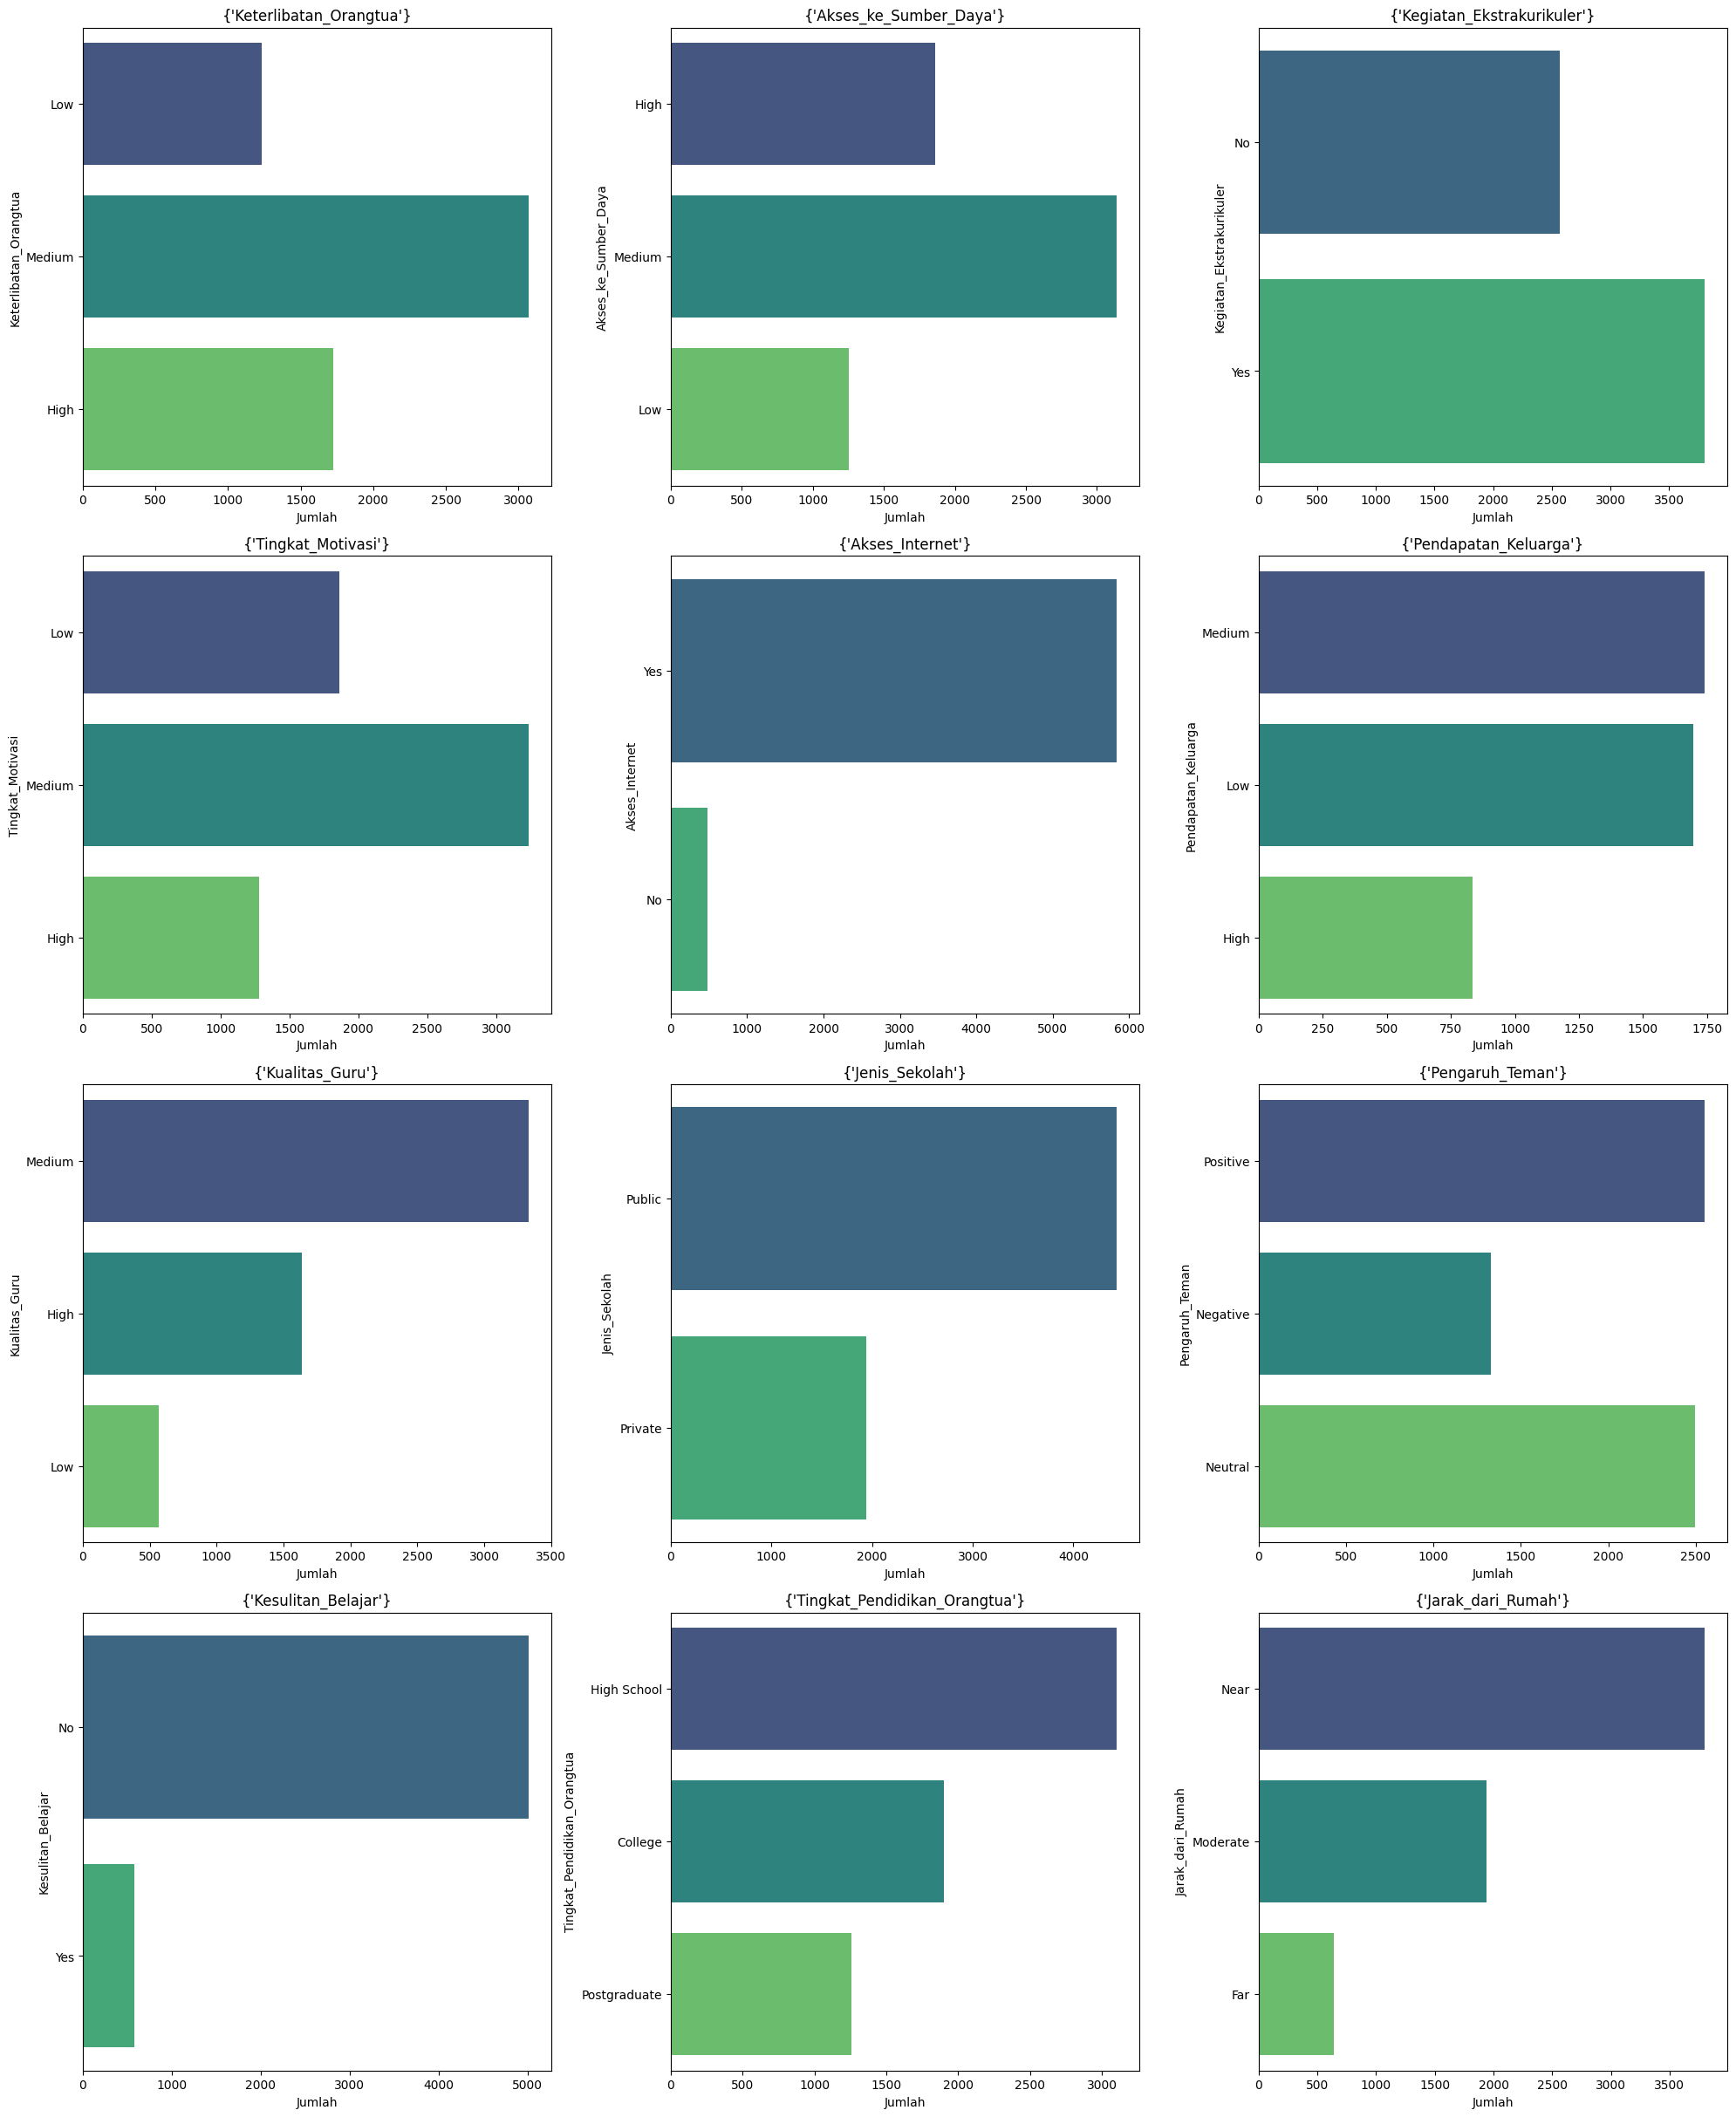

In [487]:
# Memfilter kolom bertipe object
object_columns = data_train.select_dtypes(include='object').columns

# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Membuat count plot untuk setiap kolom object
for i, column in enumerate(object_columns, 1):
    plt.subplot(5, 3, i)  # Mengatur subplot agar semua plot ditampilkan
    sns.countplot(y=data_train[column], hue=data_train[column], palette='viridis', dodge=False, legend=False)
    plt.title({column})
    plt.xlabel('Jumlah')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

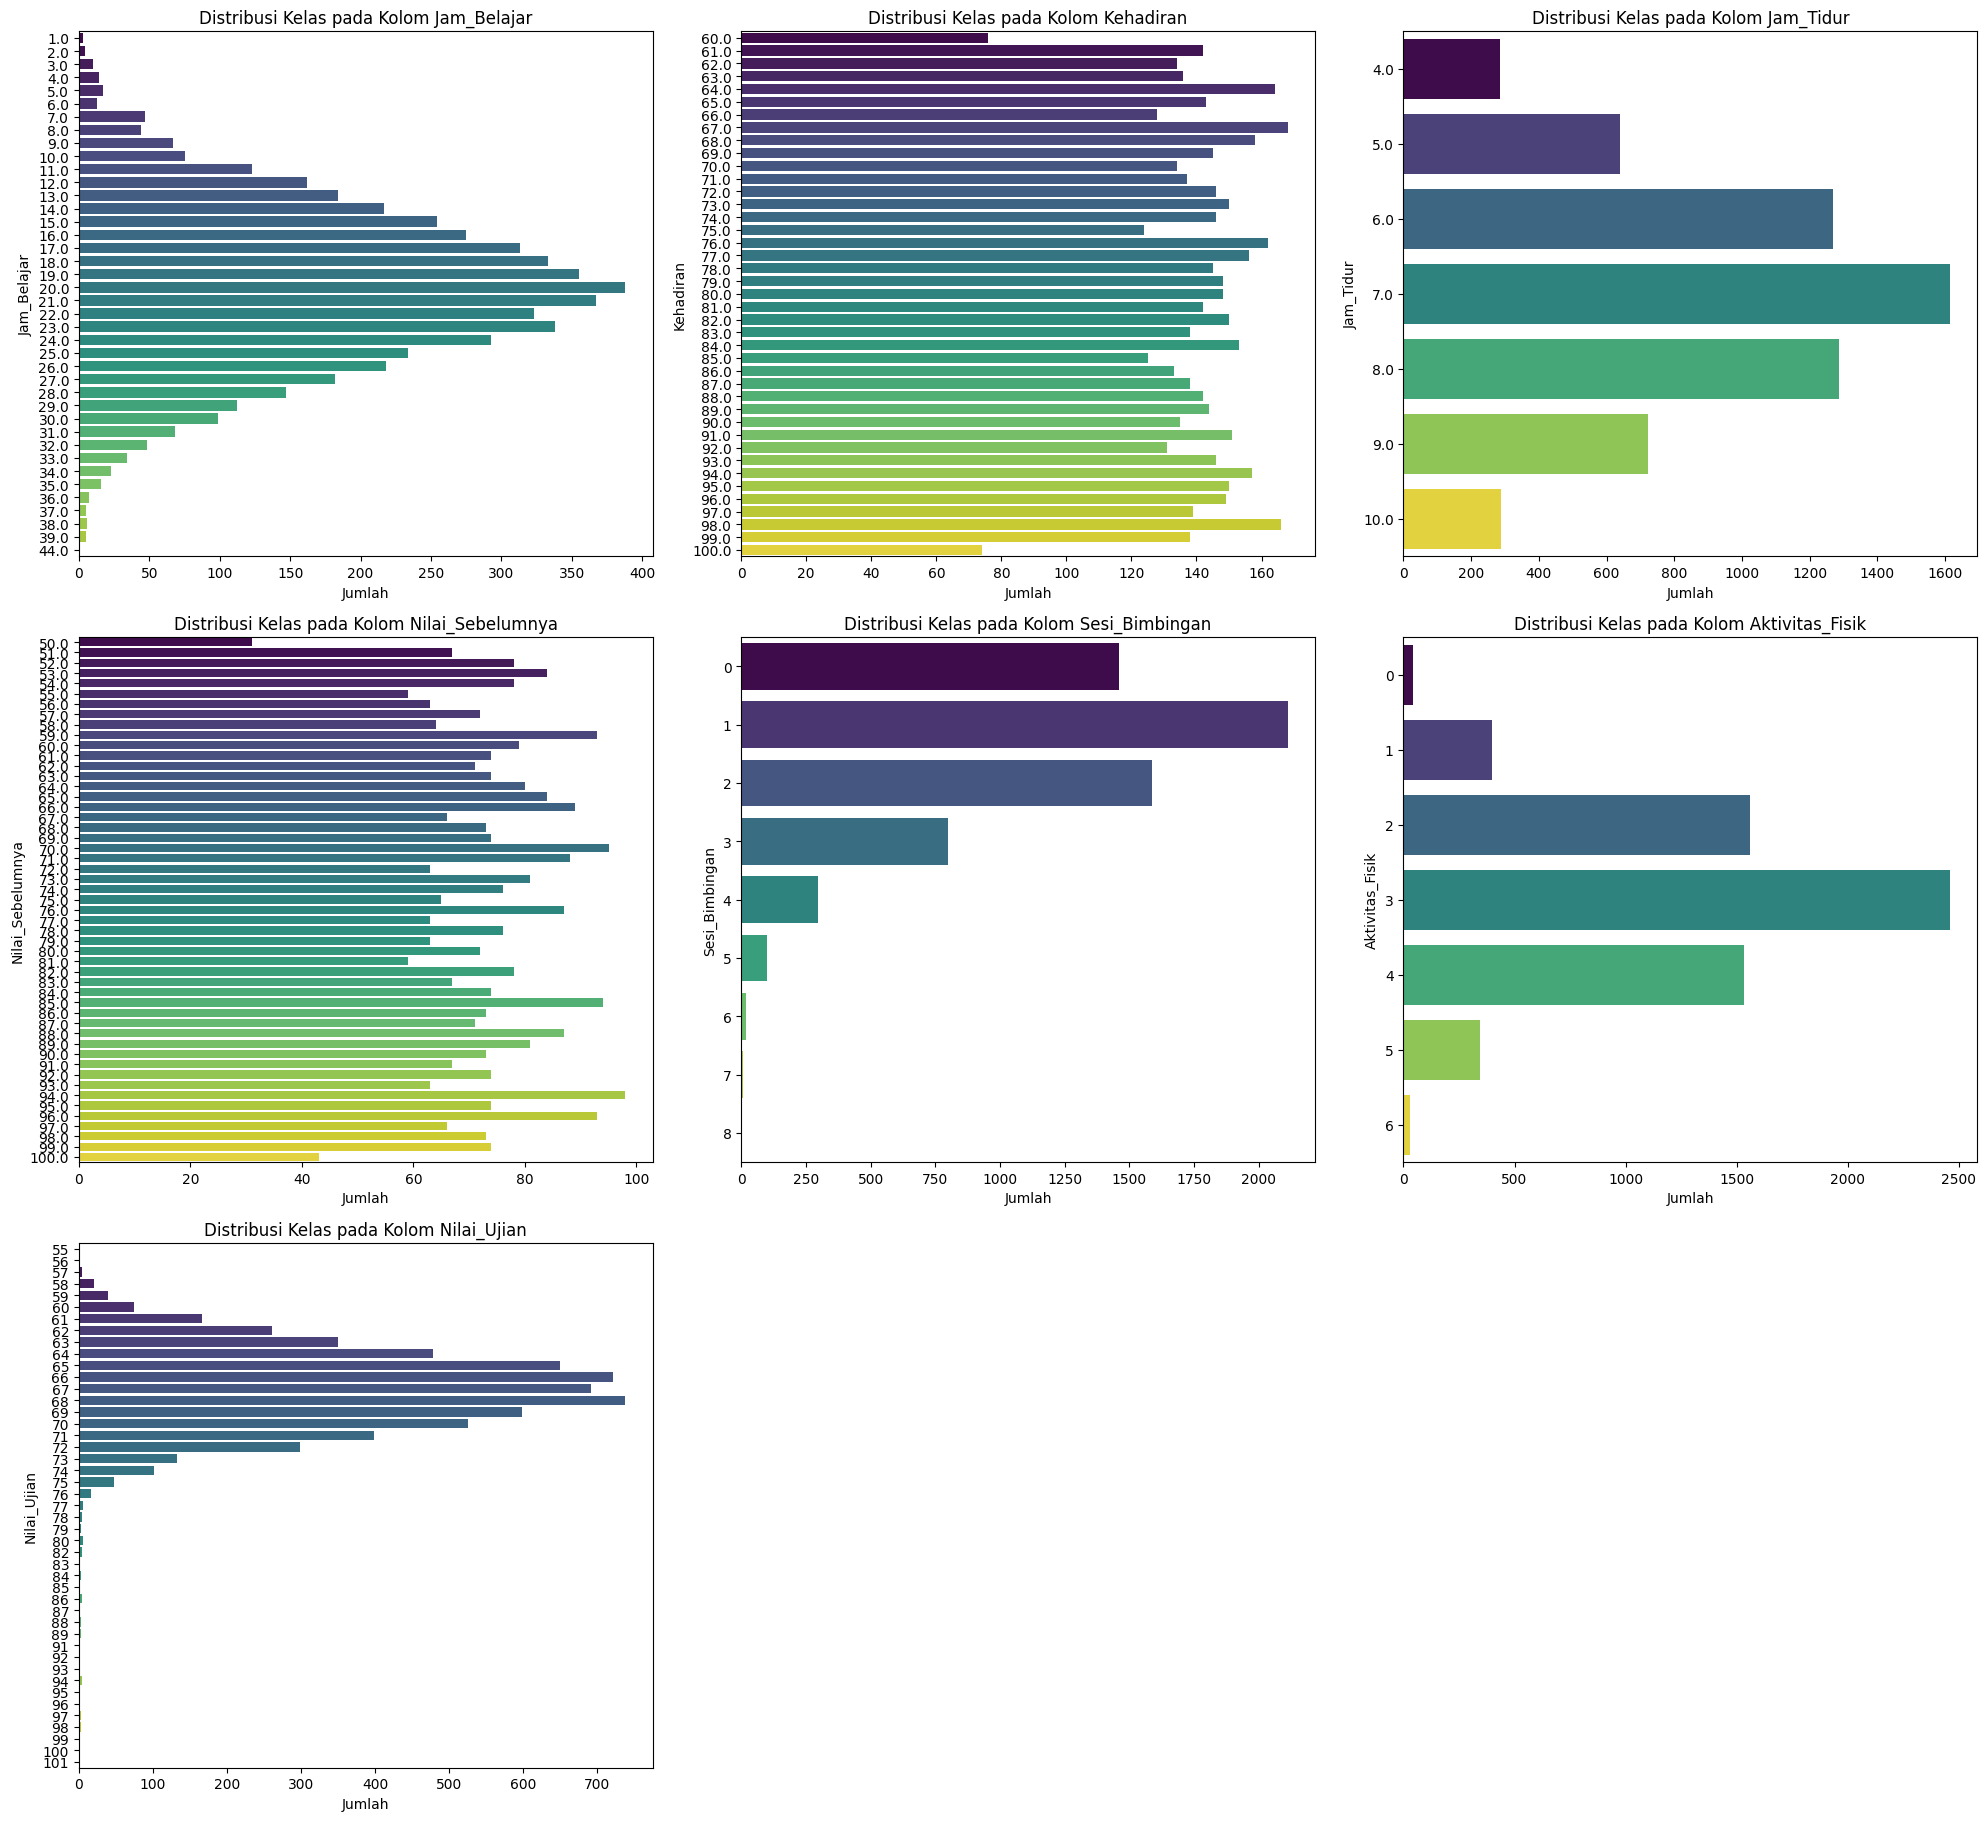

In [488]:
# Memfilter kolom bertipe object
object_columns = data_train.select_dtypes(exclude='object').columns

# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Membuat count plot untuk setiap kolom object
for i, column in enumerate(object_columns, 1):
    plt.subplot(5, 3, i)  # Mengatur subplot agar semua plot ditampilkan
    sns.countplot(y=data_train[column], hue=data_train[column], palette='viridis', dodge=False, legend=False)
    plt.title(f'Distribusi Kelas pada Kolom {column}')
    plt.xlabel('Jumlah')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

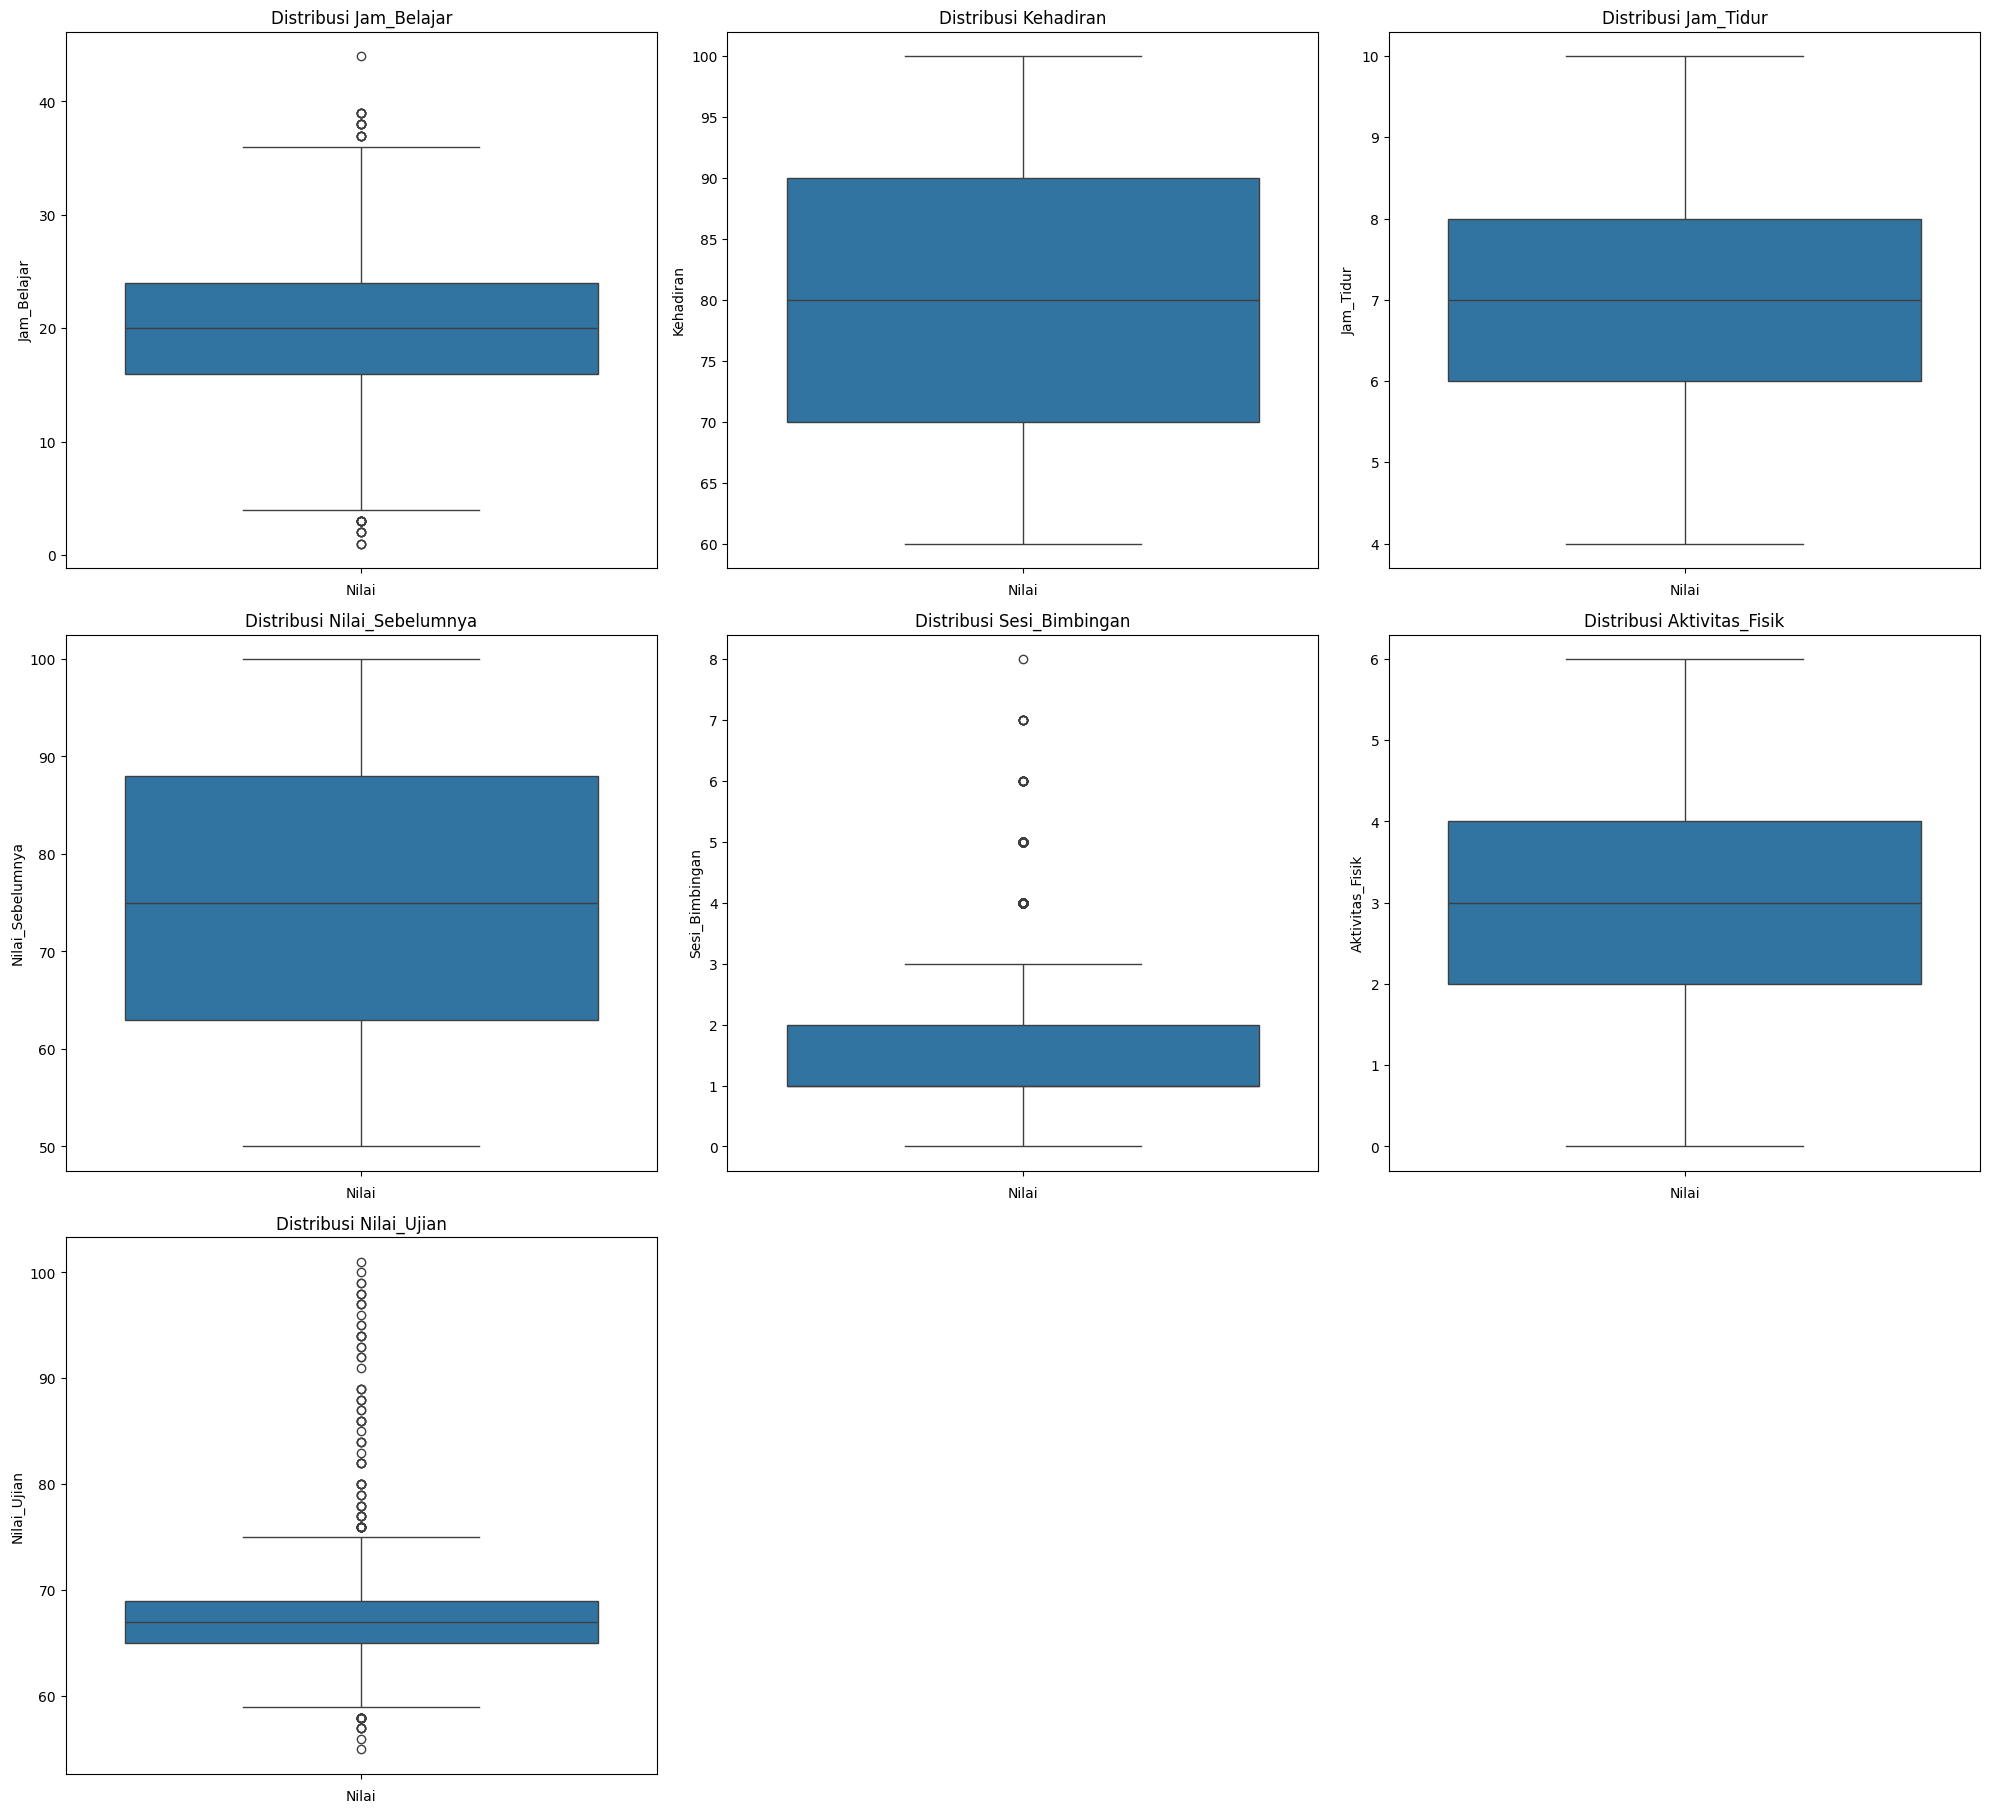

In [489]:
# Memfilter kolom bertipe object
object_columns = data_train.select_dtypes(exclude='object').columns

# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Membuat boxplot untuk setiap kolom numerik
for i, column in enumerate(object_columns, 1):
    plt.subplot(5, 3, i)  # Mengatur subplot agar semua plot ditampilkan
    sns.boxplot(y=data_train[column])  # Buat boxplot sederhana
    plt.title(f'Distribusi {column}')
    plt.xlabel('Nilai')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Data test(EDA)

In [490]:
data_test = data_test.drop("Nama",axis=1)

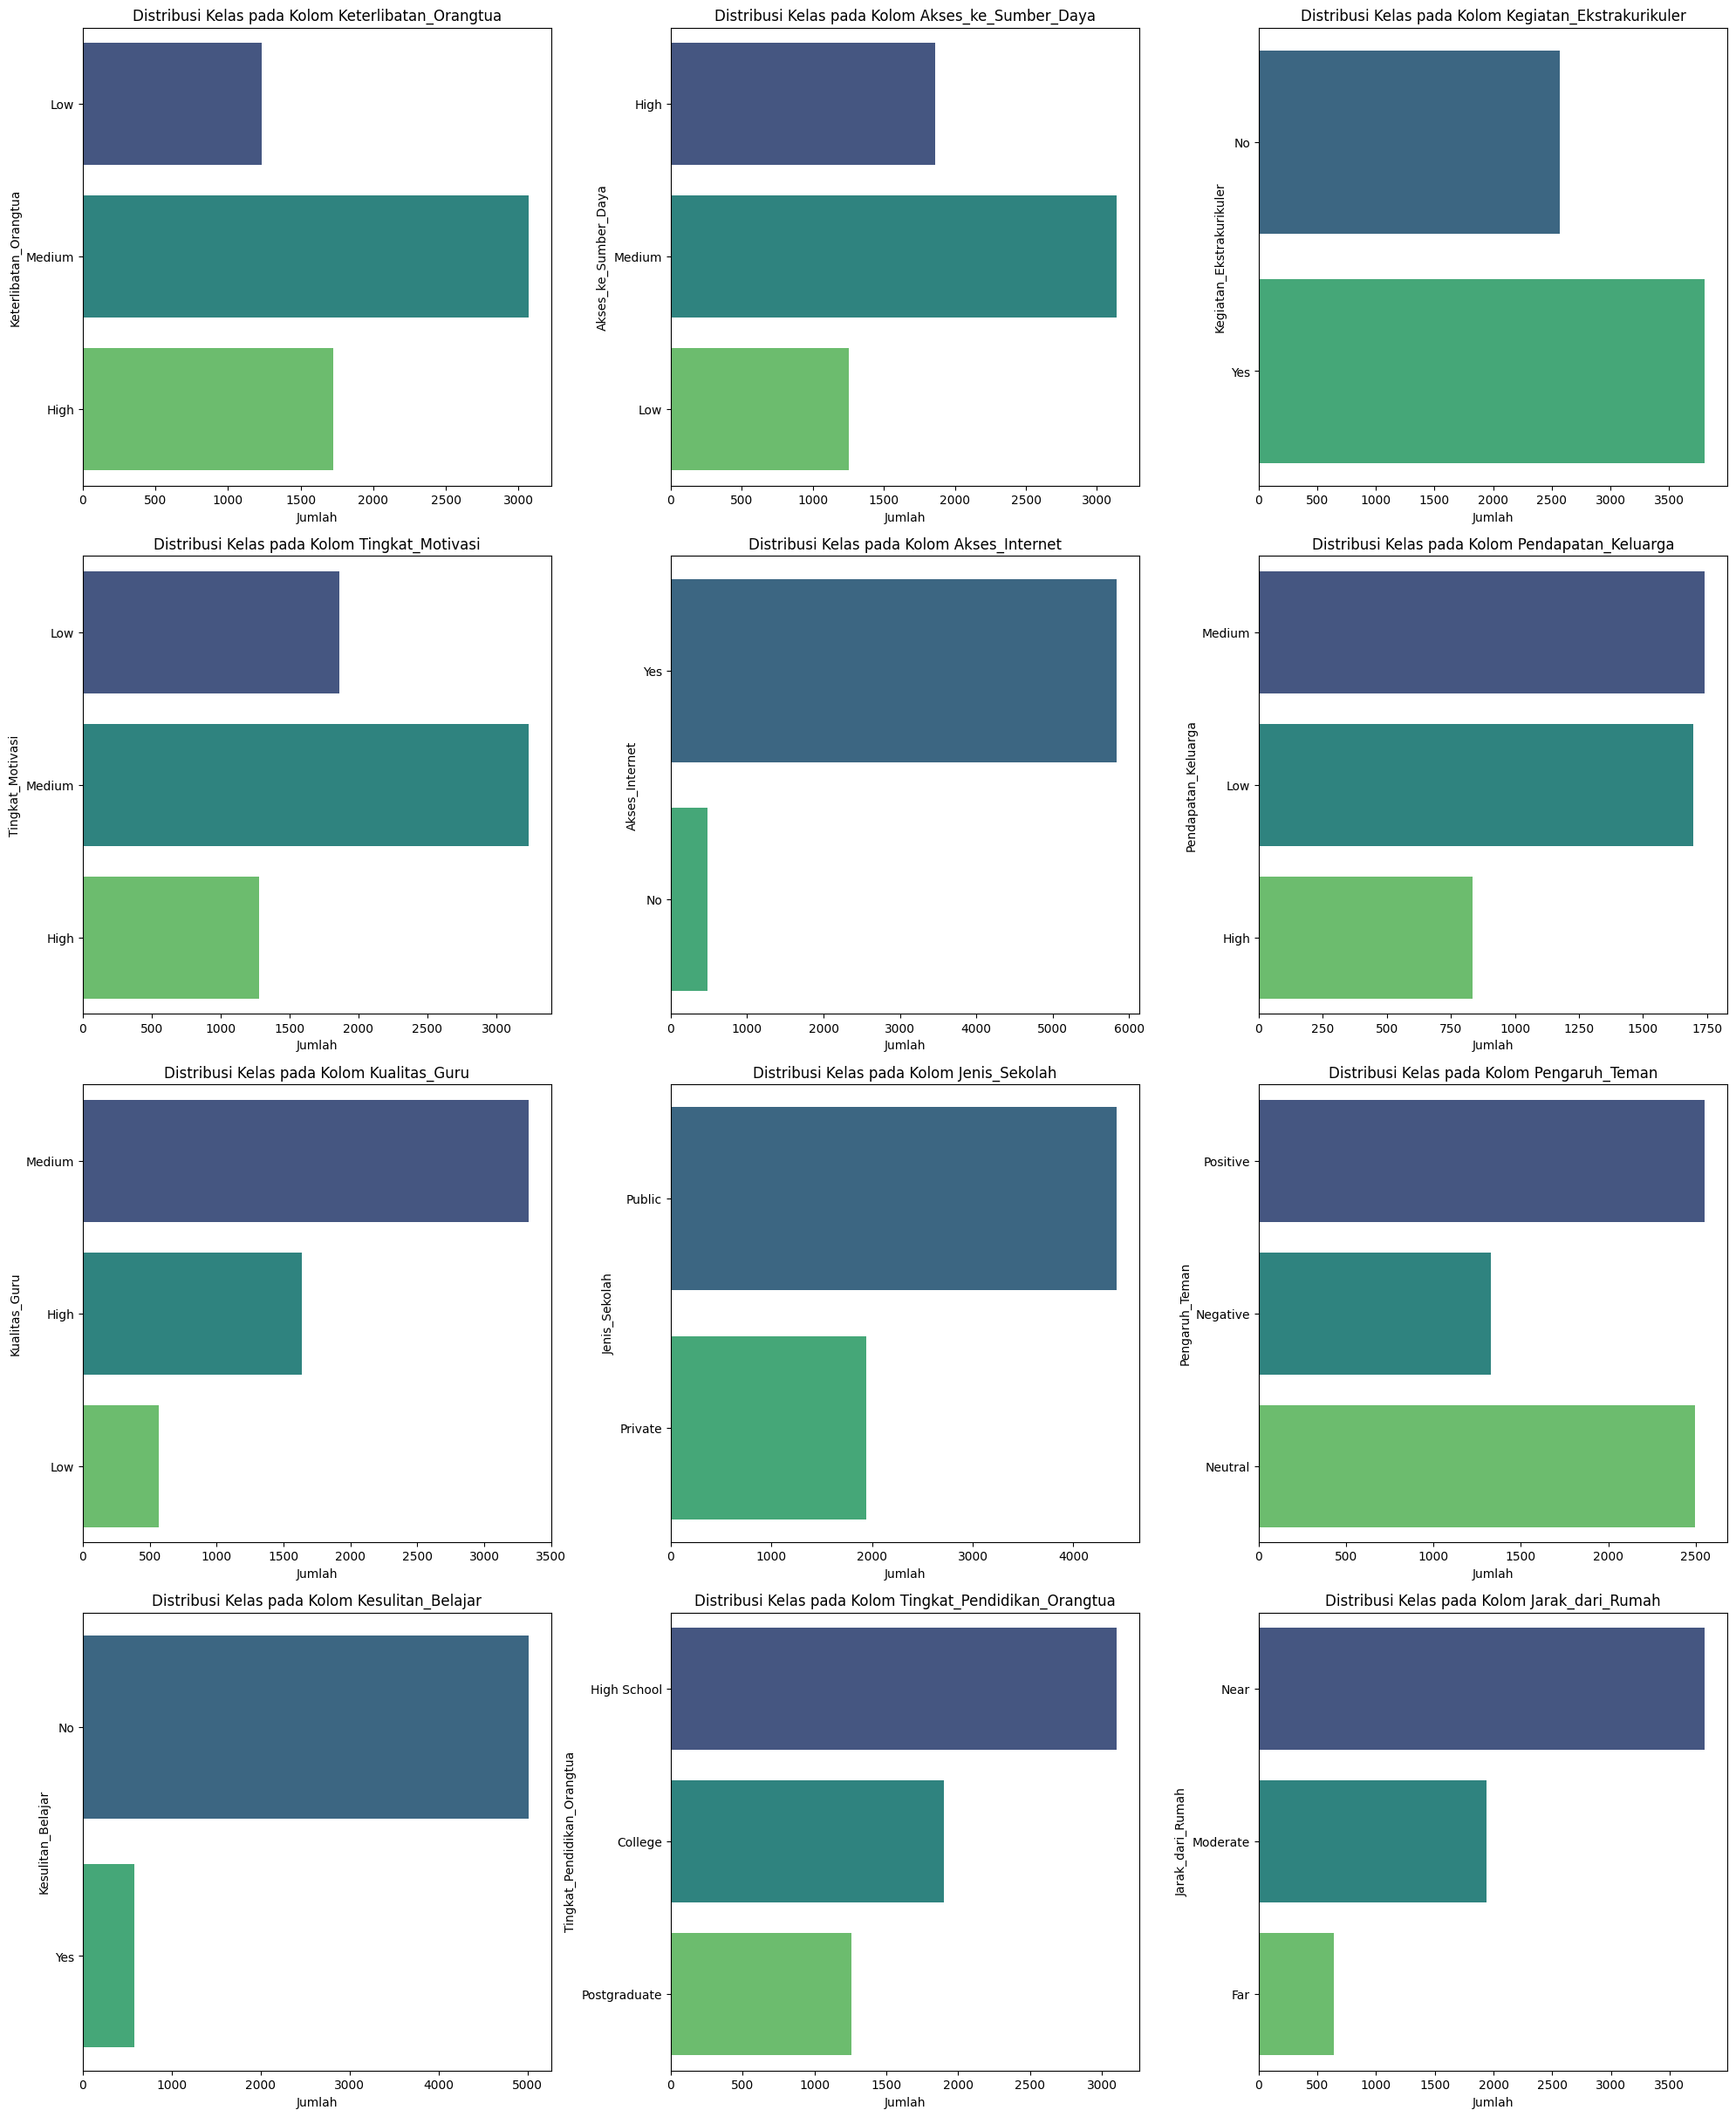

In [491]:
# Memfilter kolom bertipe object
object_columns = data_test.select_dtypes(include='object').columns

# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Membuat count plot untuk setiap kolom object
for i, column in enumerate(object_columns, 1):
    plt.subplot(5, 3, i)  # Mengatur subplot agar semua plot ditampilkan
    sns.countplot(y=data_train[column], hue=data_train[column], palette='viridis', dodge=False, legend=False)
    plt.title(f'Distribusi Kelas pada Kolom {column}')
    plt.xlabel('Jumlah')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

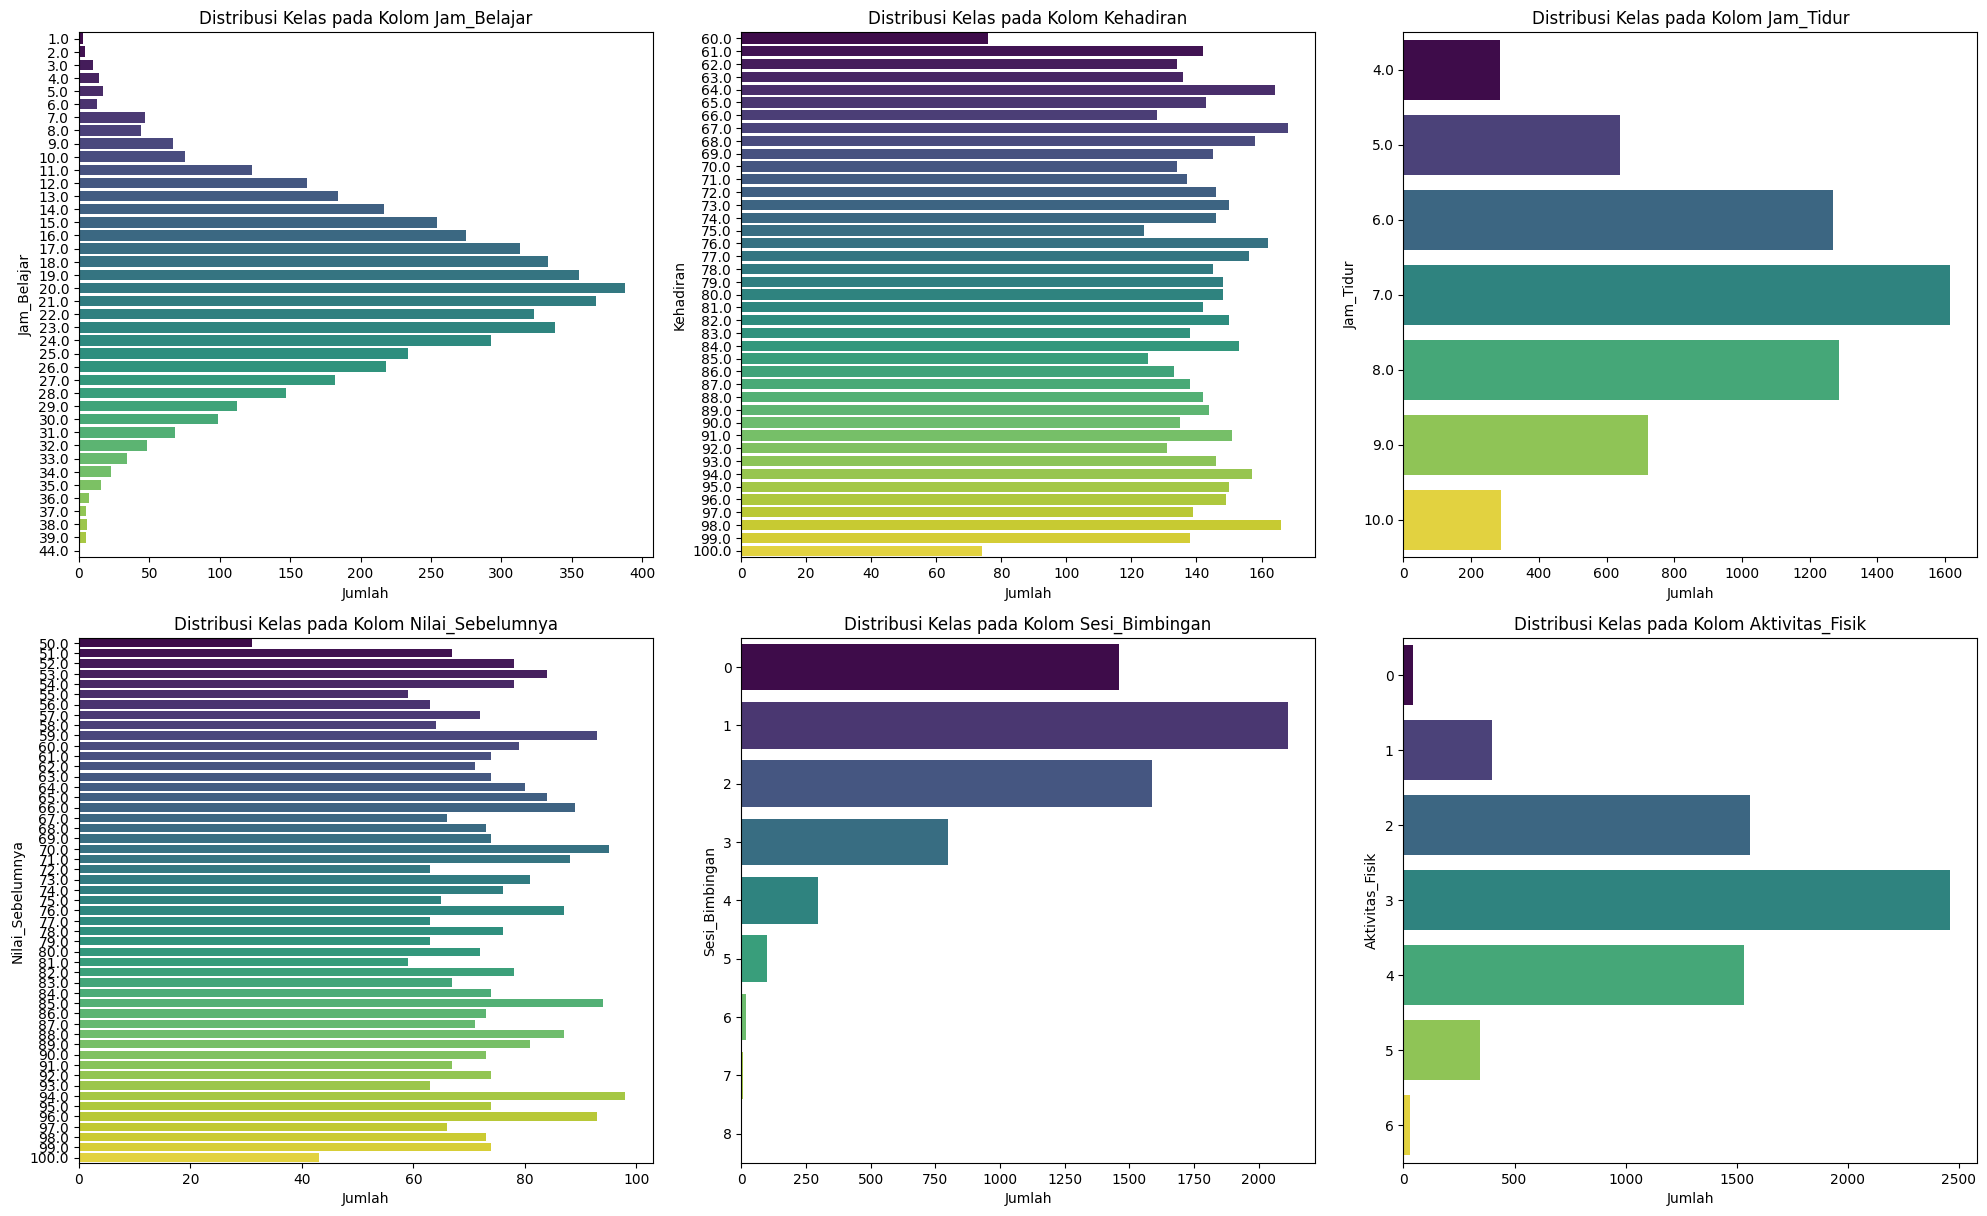

In [492]:
# Memfilter kolom bertipe object
object_columns = data_test.select_dtypes(exclude='object').columns

# Mengatur ukuran plot
plt.figure(figsize=(20, 30))

# Membuat count plot untuk setiap kolom object
for i, column in enumerate(object_columns, 1):
    plt.subplot(5, 3, i)  # Mengatur subplot agar semua plot ditampilkan
    sns.countplot(y=data_train[column], hue=data_train[column], palette='viridis', dodge=False, legend=False)
    plt.title(f'Distribusi Kelas pada Kolom {column}')
    plt.xlabel('Jumlah')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

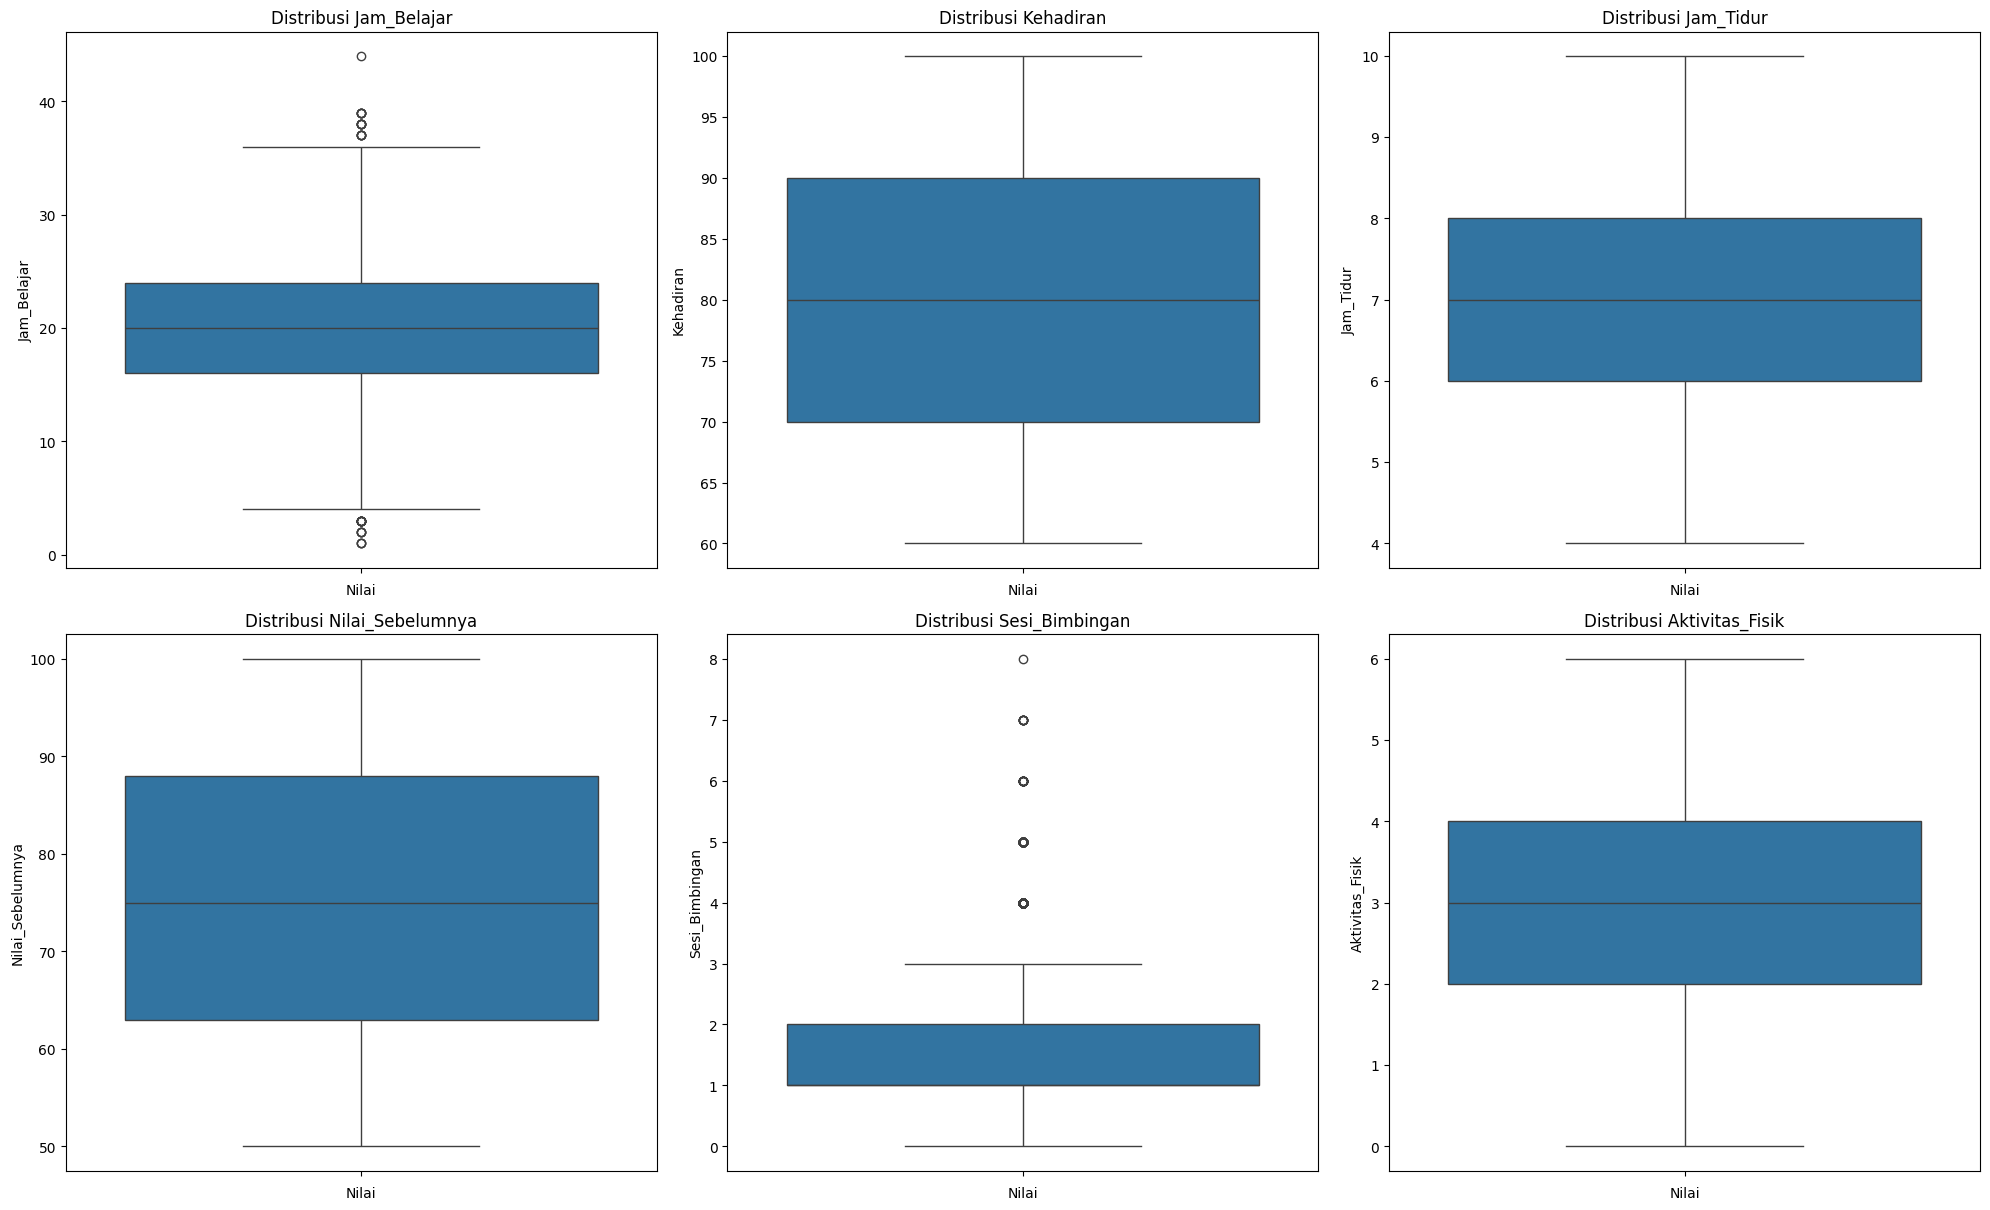

In [493]:
# Memfilter kolom bertipe object
object_columns1 = data_test.select_dtypes(exclude='object').columns

plt.figure(figsize=(20, 30))

# Membuat boxplot untuk setiap kolom numerik
for i, column in enumerate(object_columns1, 1):
    plt.subplot(5, 3, i)  # Mengatur subplot agar semua plot ditampilkan
    sns.boxplot(y=data_train[column])  # Buat boxplot sederhana
    plt.title(f'Distribusi {column}')
    plt.xlabel('Nilai')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [494]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Jam_Belajar                  5424 non-null   float64
 1   Kehadiran                    5791 non-null   float64
 2   Keterlibatan_Orangtua        6030 non-null   object 
 3   Akses_ke_Sumber_Daya         6254 non-null   object 
 4   Kegiatan_Ekstrakurikuler     6378 non-null   object 
 5   Jam_Tidur                    6104 non-null   float64
 6   Nilai_Sebelumnya             3764 non-null   float64
 7   Tingkat_Motivasi             6378 non-null   object 
 8   Akses_Internet               6324 non-null   object 
 9   Sesi_Bimbingan               6378 non-null   int64  
 10  Pendapatan_Keluarga          4274 non-null   object 
 11  Kualitas_Guru                5537 non-null   object 
 12  Jenis_Sekolah                6378 non-null   object 
 13  Pengaruh_Teman    

In [495]:
data_train.isnull().sum()

Jam_Belajar                     954
Kehadiran                       587
Keterlibatan_Orangtua           348
Akses_ke_Sumber_Daya            124
Kegiatan_Ekstrakurikuler          0
Jam_Tidur                       274
Nilai_Sebelumnya               2614
Tingkat_Motivasi                  0
Akses_Internet                   54
Sesi_Bimbingan                    0
Pendapatan_Keluarga            2104
Kualitas_Guru                   841
Jenis_Sekolah                     0
Pengaruh_Teman                    0
Aktivitas_Fisik                   0
Kesulitan_Belajar               786
Tingkat_Pendidikan_Orangtua     119
Jarak_dari_Rumah                  0
Nilai_Ujian                       0
dtype: int64

Karena kita tahu fitur "Jam Belajar" terdistribusi normal dan ada outlier maka kita atasi dengan median

In [496]:
mean_value_jam = data_train['Jam_Belajar'].median()

# Mengisi missing value pada kolom 'Jam_Belajar' dengan nilai mean
data_train['Jam_Belajar'] = data_train['Jam_Belajar'].fillna(mean_value_jam)

In [497]:
mean_value_kehadiran = data_train['Kehadiran'].mean()
data_train = data_train.fillna(mean_value_kehadiran) 


In [498]:
# Buat objek KNNImputer
imputer = KNNImputer(n_neighbors=2)  # Menggunakan 2 tetangga terdekat

# Fit dan transform data
data_train[['Nilai_Sebelumnya']] = imputer.fit_transform(data_train[['Nilai_Sebelumnya']])

data_train[['Nilai_Sebelumnya']].isnull().sum()


Nilai_Sebelumnya    0
dtype: int64

# Kita perlakukan sama dengan data test

In [499]:
median_value_jam2 = data_test['Jam_Belajar'].median()
data_test = data_test.fillna(median_value_jam2) 
data_test['Jam_Belajar'].isnull().sum()

0

In [500]:
mean_value_kehadiran2 = data_test['Kehadiran'].mean()
data_test = data_test.fillna(mean_value_kehadiran2) 
data_test['Kehadiran'].isnull().sum()

0

In [501]:
# Buat objek KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Menggunakan 2 tetangga terdekat

# Fit dan transform data
data_test[['Nilai_Sebelumnya']] = imputer.fit_transform(data_test[['Nilai_Sebelumnya']])

data_test[['Nilai_Sebelumnya']].isnull().sum()


Nilai_Sebelumnya    0
dtype: int64

In [502]:
ordinal_encoder = OrdinalEncoder()
imputer = KNNImputer(n_neighbors=3)

# Identifikasi kolom kategorikal dan pastikan semua nilainya diubah menjadi string
categorical_columns = ['Keterlibatan_Orangtua', 'Tingkat_Pendidikan_Orangtua', 
                       'Akses_Internet', 'Akses_ke_Sumber_Daya']

# Konversi nilai kolom kategorikal menjadi string agar seragam
data_train[categorical_columns] = data_train[categorical_columns].astype(str)

# Transformasikan kolom kategorikal ke bentuk numerik
data_train[categorical_columns] = ordinal_encoder.fit_transform(data_train[categorical_columns])

# Lakukan imputasi dengan KNNImputer
data_train[categorical_columns] = imputer.fit_transform(data_train[categorical_columns])

# Kembalikan ke bentuk kategori dengan inverse_transform
data_train[categorical_columns] = ordinal_encoder.inverse_transform(data_train[categorical_columns])

# Untuk kolom numerik, misalnya 'Jam_Tidur', bisa dilakukan imputasi rata-rata (mean) secara langsung
mean_value_tidur = data_train['Jam_Tidur'].mean()
data_train['Jam_Tidur'] = data_train['Jam_Tidur'].fillna(mean_value_tidur)

print(data_train)


      Jam_Belajar  Kehadiran Keterlibatan_Orangtua Akses_ke_Sumber_Daya  \
0            20.0  84.000000                   Low                 High   
1            19.0  80.006217                   Low               Medium   
2            24.0  98.000000                Medium               Medium   
3            29.0  89.000000                   Low               Medium   
4            20.0  92.000000                Medium               Medium   
...           ...        ...                   ...                  ...   
6373         25.0  69.000000                  High               Medium   
6374         23.0  76.000000                  High               Medium   
6375         20.0  90.000000                Medium                  Low   
6376         10.0  86.000000                  High                 High   
6377         15.0  67.000000                Medium                  Low   

     Kegiatan_Ekstrakurikuler  Jam_Tidur  Nilai_Sebelumnya Tingkat_Motivasi  \
0                   

In [503]:
ordinal_encoder = OrdinalEncoder()
imputer = KNNImputer(n_neighbors=3)

# Identifikasi kolom kategorikal dan ubah ke numerik dengan OrdinalEncoder
categorical_columns = ['Keterlibatan_Orangtua', 'Tingkat_Pendidikan_Orangtua', 
                       'Akses_Internet', 'Akses_ke_Sumber_Daya']

# Transformasikan kolom kategorikal ke bentuk numerik
data_test[categorical_columns] = ordinal_encoder.fit_transform(data_test[categorical_columns].astype(str))

# Lakukan imputasi dengan KNNImputer
data_test[categorical_columns] = imputer.fit_transform(data_test[categorical_columns])

# Kembalikan ke bentuk kategori dengan inverse_transform
data_test[categorical_columns] = ordinal_encoder.inverse_transform(data_test[categorical_columns])

# Untuk kolom numerik, misalnya 'Jam_Tidur', bisa dilakukan imputasi rata-rata (mean) secara langsung
mean_value_tidur = data_test['Jam_Tidur'].mean()
data_test['Jam_Tidur'] = data_test['Jam_Tidur'].fillna(mean_value_tidur)

# OrdinalEncode

In [504]:
data_train["Pendapatan_Keluarga"] = data_train["Pendapatan_Keluarga"].astype(str)

In [505]:
# Encoding kategori menjadi numerik (ordinal)
ordinal_encoder = OrdinalEncoder()
data_train[['Pendapatan_Keluarga']] = ordinal_encoder.fit_transform(data_train[['Pendapatan_Keluarga']])

# KNN Imputer
imputer = KNNImputer(n_neighbors=6)
# Imputasi pada kolom 'pendapat_keluarga'
imputed_data = imputer.fit_transform(data_train[['Pendapatan_Keluarga']])

# Update nilai pada kolom 'pendapat_keluarga' dengan hasil imputasi
data_train[['Pendapatan_Keluarga']] = imputed_data

# Kembalikan ke bentuk kategori dengan inverse_transform
data_train[['Pendapatan_Keluarga']] = ordinal_encoder.inverse_transform(data_train[['Pendapatan_Keluarga']])

print(data_train)


      Jam_Belajar  Kehadiran Keterlibatan_Orangtua Akses_ke_Sumber_Daya  \
0            20.0  84.000000                   Low                 High   
1            19.0  80.006217                   Low               Medium   
2            24.0  98.000000                Medium               Medium   
3            29.0  89.000000                   Low               Medium   
4            20.0  92.000000                Medium               Medium   
...           ...        ...                   ...                  ...   
6373         25.0  69.000000                  High               Medium   
6374         23.0  76.000000                  High               Medium   
6375         20.0  90.000000                Medium                  Low   
6376         10.0  86.000000                  High                 High   
6377         15.0  67.000000                Medium                  Low   

     Kegiatan_Ekstrakurikuler  Jam_Tidur  Nilai_Sebelumnya Tingkat_Motivasi  \
0                   

In [506]:
data_test["Pendapatan_Keluarga"] = data_test["Pendapatan_Keluarga"].astype(str)

In [507]:
data_test[['Pendapatan_Keluarga']] = ordinal_encoder.fit_transform(data_test[['Pendapatan_Keluarga']])

# KNN Imputer
imputer = KNNImputer(n_neighbors=3)
# Imputasi pada kolom 'pendapat_keluarga'
imputed_data2 = imputer.fit_transform(data_test[['Pendapatan_Keluarga']])

# Update nilai pada kolom 'pendapat_keluarga' dengan hasil imputasi
data_test[['Pendapatan_Keluarga']] = imputed_data2

# Kembalikan ke bentuk kategori dengan inverse_transform
data_test[['Pendapatan_Keluarga']] = ordinal_encoder.inverse_transform(data_test[['Pendapatan_Keluarga']])

print(data_test)

      Jam_Belajar  Kehadiran Keterlibatan_Orangtua Akses_ke_Sumber_Daya  \
0            20.0         77                Medium                 High   
1            28.0         95                Medium               Medium   
2            21.0         85                Medium                 High   
3            16.0         87                  High               Medium   
4            24.0         80                  High               Medium   
...           ...        ...                   ...                  ...   
1037         16.0         81                Medium               Medium   
1038         19.0         64                  High               Medium   
1039         20.0         61                Medium               Medium   
1040         15.0         96                  High               Medium   
1041         21.0         97                Medium                 High   

     Kegiatan_Ekstrakurikuler  Jam_Tidur  Nilai_Sebelumnya Tingkat_Motivasi  \
0                   

In [508]:
# Mengidentifikasi kolom kategorikal
categorical_features = data_train.select_dtypes(exclude=['int64', 'float64']).columns

# Inisialisasi OrdinalEncoder dengan penanganan kategori tak dikenal
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit dan transform pada data train
data_train[categorical_features] = ordinal_encoder.fit_transform(data_train[categorical_features].astype(str))

# Transform data test menggunakan encoder yang sama
data_test[categorical_features] = ordinal_encoder.transform(data_test[categorical_features].astype(str))



In [509]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Pisahkan kolom 'Nilai_Ujian' dari data_train
exclude_column = 'Nilai_Ujian'
data_train_excluded = data_train.drop(columns=[exclude_column])

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform pada data_train tanpa kolom 'Nilai_Ujian'
train_scaled = scaler.fit_transform(data_train_excluded)
test_scaled = scaler.transform(data_test)

# Konversi hasil scaling ke DataFrame dengan kolom yang sesuai
df_train = pd.DataFrame(train_scaled, columns=data_train_excluded.columns)
df_test = pd.DataFrame(test_scaled, columns=data_test.columns)

# Tambahkan kembali kolom 'Nilai_Ujian' pada df_train
df_train[exclude_column] = data_train[exclude_column].values

# Menyusun ulang kolom agar sesuai dengan urutan asli di data_train
df_train = df_train[data_train.columns]


In [510]:
df_train.head()

,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah,Nilai_Ujian
0,0.000909,3.616546e-01,-0.104007,-1.270453,-1.216859,-0.212962,0.251871,-0.392403,0.290938,-1.211858,-1.228554,0.872432,0.662141,1.068637,0.026516,0.071432,0.186219,0.751449,67
1,-0.180192,1.286855e-15,-0.104007,0.916873,-1.216859,-0.145697,0.251871,-0.392403,0.290938,0.409036,1.257923,0.872432,0.662141,-1.575695,0.998480,0.071432,-1.161911,-0.740223,61
2,0.725312,1.629416e+00,0.916541,0.916873,0.821788,-0.212962,0.251871,0.884508,0.290938,0.409036,-1.228554,0.872432,0.662141,-0.253529,0.998480,0.071432,1.534348,0.751449,74
3,1.630817,8.144265e-01,-0.104007,0.916873,0.821788,-0.145697,1.840595,0.884508,0.290938,-0.401411,1.257923,0.872432,0.662141,-1.575695,0.998480,0.071432,0.186219,-0.740223,71
4,0.000909,1.086090e+00,0.916541,0.916873,0.821788,-0.280228,-1.073071,0.884508,0.290938,1.219483,1.257923,-0.877095,0.662141,-0.253529,0.998480,0.071432,-1.161911,0.751449,70


In [511]:
df_test.head()

,Jam_Belajar,Kehadiran,Keterlibatan_Orangtua,Akses_ke_Sumber_Daya,Kegiatan_Ekstrakurikuler,Jam_Tidur,Nilai_Sebelumnya,Tingkat_Motivasi,Akses_Internet,Sesi_Bimbingan,Pendapatan_Keluarga,Kualitas_Guru,Jenis_Sekolah,Pengaruh_Teman,Aktivitas_Fisik,Kesulitan_Belajar,Tingkat_Pendidikan_Orangtua,Jarak_dari_Rumah
0,0.000909,-0.272226,0.916541,-1.270453,0.821788,-0.212962,-2.132585,0.884508,0.290938,-0.401411,0.429097,0.872432,0.662141,1.068637,0.998480,0.071432,0.186219,0.751449
1,1.449716,1.357753,0.916541,0.916873,0.821788,-0.145697,0.251323,0.884508,0.290938,-1.211858,-2.057379,0.872432,-1.510253,-1.575695,-0.945447,0.071432,0.186219,-0.740223
2,0.182010,0.452209,0.916541,-1.270453,0.821788,-0.347493,-2.132585,0.884508,0.290938,0.409036,0.429097,0.872432,-1.510253,-0.253529,0.026516,0.071432,-1.161911,0.751449
3,-0.723495,0.633318,-1.124555,0.916873,0.821788,-0.212962,0.163030,0.884508,0.290938,-0.401411,0.429097,0.872432,0.662141,-0.253529,0.998480,0.071432,1.534348,-0.740223
4,0.725312,-0.000563,-1.124555,0.916873,0.821788,-0.212962,-0.455021,0.884508,-2.859491,0.409036,1.257923,0.872432,0.662141,-0.253529,0.026516,0.071432,0.186219,0.751449


In [512]:
X = data_train.drop("Nilai_Ujian", axis=1)  # Fitur
y = data_train["Nilai_Ujian"]  # Target

In [513]:
models = CatBoostRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models.fit(X_train, y_train)

Learning rate set to 0.052967
0:	learn: 3.8361193	total: 1.35ms	remaining: 1.35s
1:	learn: 3.7651053	total: 2.08ms	remaining: 1.03s
2:	learn: 3.6983634	total: 3.11ms	remaining: 1.03s
3:	learn: 3.6298161	total: 3.9ms	remaining: 970ms
4:	learn: 3.5657455	total: 4.79ms	remaining: 952ms
5:	learn: 3.5071380	total: 5.48ms	remaining: 908ms
6:	learn: 3.4525360	total: 6.33ms	remaining: 898ms
7:	learn: 3.4002971	total: 7.35ms	remaining: 911ms
8:	learn: 3.3486182	total: 8.14ms	remaining: 897ms
9:	learn: 3.3022091	total: 8.82ms	remaining: 873ms
10:	learn: 3.2654604	total: 9.62ms	remaining: 865ms
11:	learn: 3.2265063	total: 10.5ms	remaining: 866ms
12:	learn: 3.1888222	total: 11.2ms	remaining: 849ms
13:	learn: 3.1523777	total: 11.9ms	remaining: 837ms
14:	learn: 3.1248741	total: 12.5ms	remaining: 820ms
15:	learn: 3.0985557	total: 13.3ms	remaining: 816ms
16:	learn: 3.0700738	total: 14ms	remaining: 812ms
17:	learn: 3.0433178	total: 14.8ms	remaining: 810ms
18:	learn: 3.0149238	total: 15.6ms	remaining: 8

In [514]:
y_pred_catboost = models.predict(X_test)

In [515]:
pred_catbos = models.predict(data_test)

In [516]:
"""# Preprocessing data (contoh sederhana)
X = data_train.drop("Nilai_Ujian", axis=1)  # Fitur
y = data_train["Nilai_Ujian"]  # Target

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)"""

'# Preprocessing data (contoh sederhana)\nX = data_train.drop("Nilai_Ujian", axis=1)  # Fitur\ny = data_train["Nilai_Ujian"]  # Target\n\n# Split data menjadi training dan testing set\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Membuat model Random Forest\nmodel = RandomForestRegressor(n_estimators=100, random_state=42)\n\n# Melatih model\nmodel.fit(X_train, y_train)\n\n# Prediksi pada data testing\ny_pred = model.predict(X_test)'

In [517]:
pred_labels_catbos = pd.Series(pred_catbos) 

In [518]:
pred_labels_catbos.value_counts()

66.899401    1
71.363111    1
65.923730    1
68.472017    1
71.973504    1
            ..
66.607134    1
65.357781    1
64.279972    1
69.036881    1
70.328012    1
Name: count, Length: 1042, dtype: int64

In [519]:
print(root_mean_squared_error(y_test,y_pred_catboost))

2.358300849242143


In [520]:
data_test = pd.read_csv('/Users/erwinqodariyah/Documents/SEMESTER_3/Machine Learning/praktikum-3/praktikum-3-ml-rka-2024/Performa_Siswa_Anime(Test).csv')
submission = pd.DataFrame({
    "Nama": data_test["Nama"],
    "Nilai": pred_labels_catbos
})
submission

,Nama,Nilai
0,Ouzen (オーゼン),66.899401
1,"Yuigahama, Yui (由比ヶ浜 結衣)",70.021337
2,Hiei (飛影),70.978191
3,Dabi (荼毘),68.483978
4,"Nikiforov, Victor (ヴィクトル・ニキフォロフ)",68.232317
...,...,...
1037,"Saotome, Mary (早乙女 芽亜里)",65.957219
1038,"Aoyama, Nanami (青山 七海)",66.149346
1039,Tobi (トビ),63.086346
1040,"Evans, Soul Eater (ソウル・イーター・エヴァンス)",69.289473


In [521]:
submission.to_csv('submit4.csv', index=False)